In [1]:
#Author-Vishal Burman

In [2]:
#Importing the relevant libraries

from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras import models

c:\users\vishal\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#Loading the model

model=load_model("CatsVsDogs_2.h5")

In [4]:
#Summary of the model

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
#Preprocessing a single image

img_path="cat.1700.jpg"
img=image.load_img(img_path, target_size=(150, 150))
img_tensor=image.img_to_array(img)
img_tensor=np.expand_dims(img_tensor, axis=0)
img_tensor/=255.

print(img_tensor.shape)

(1, 150, 150, 3)


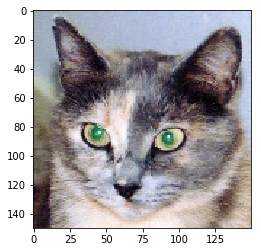

In [6]:
#Displaying the Test picture

plt.imshow(img_tensor[0])
plt.show()

In [7]:
#Instantiating a model from an input tensor and a list of output tensors

layer_outputs=[layer.output for layer in model.layers[:8]]
activation_model=models.Model(inputs=model.input, outputs=layer_outputs)

In [8]:
#Running the model in predict mode

activations=activation_model.predict(img_tensor)

In [9]:
#Example-The activation of the first convolution layer

first_layer_activation=activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


In [10]:
"""

It's a 148 x 148 feature map with 32 channels. 

"""

"\n\nIt's a 148 x 148 feature map with 32 channels. \n\n"

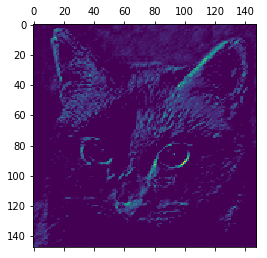

In [10]:
#Visualising the fourth channel

plt.matshow(first_layer_activation[0, :, :, 3])

In [11]:
"""

The above layers appears to encode somewhat a diagonal edge detector. 

"""

'\n\nThe above layers appears to encode somewhat a diagonal edge detector. \n\n'

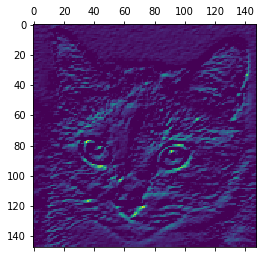

In [12]:
#Visualising the 30th channel

plt.matshow(first_layer_activation[0, :, :, 28])

In [ ]:
"""

The above filter looks to more prominently incorporate the eyes and the nose of the cat.

"""

c:\users\vishal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


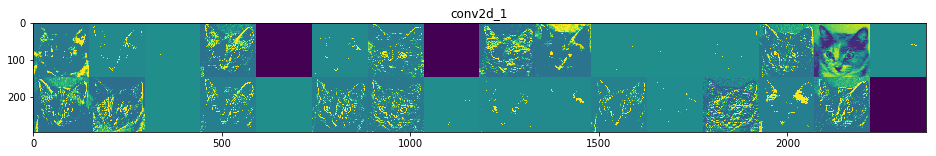

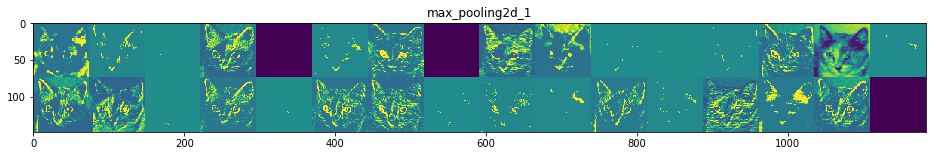

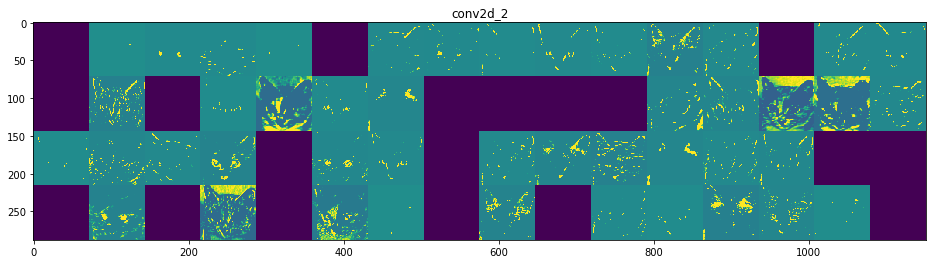

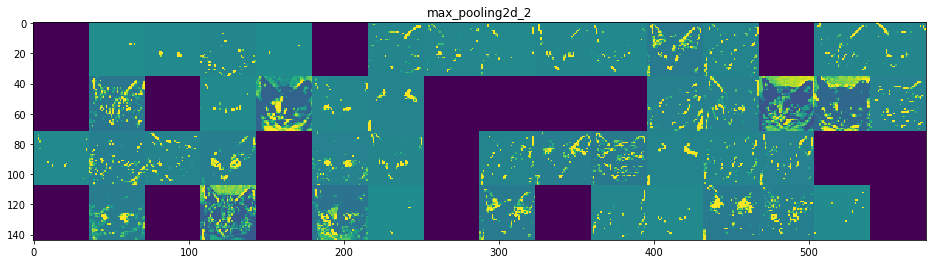

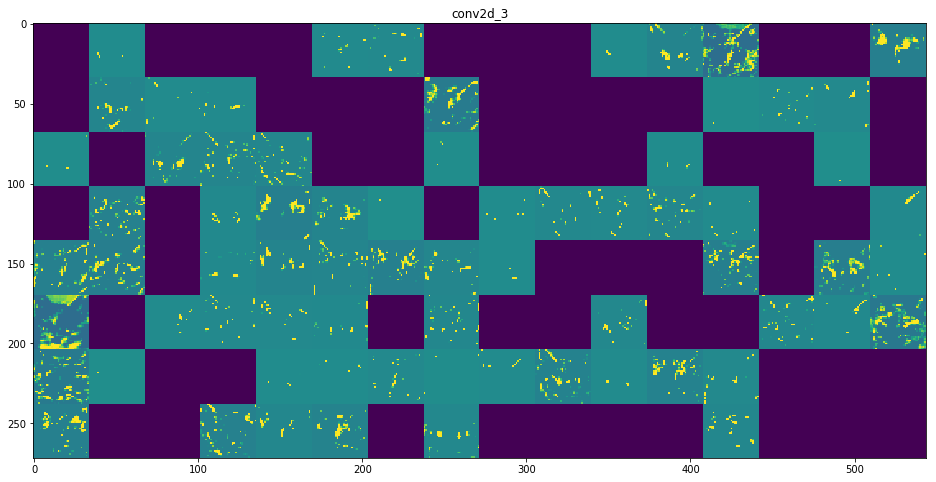

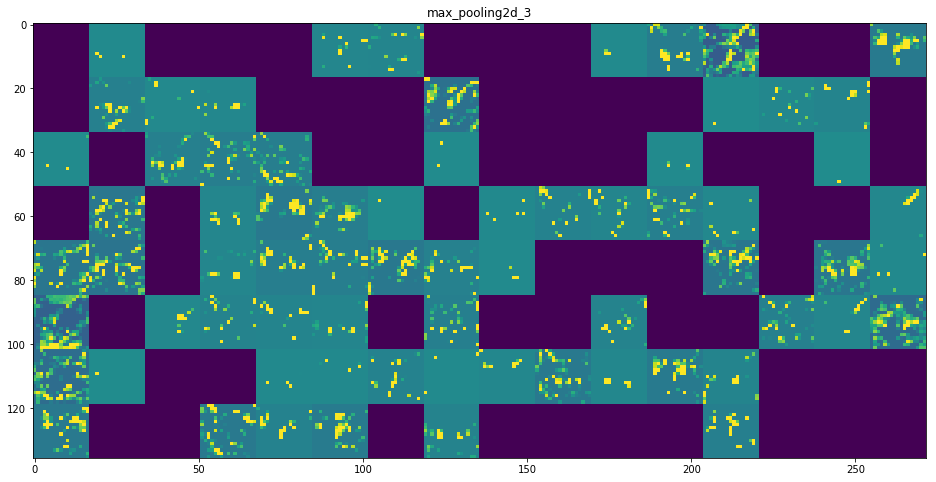

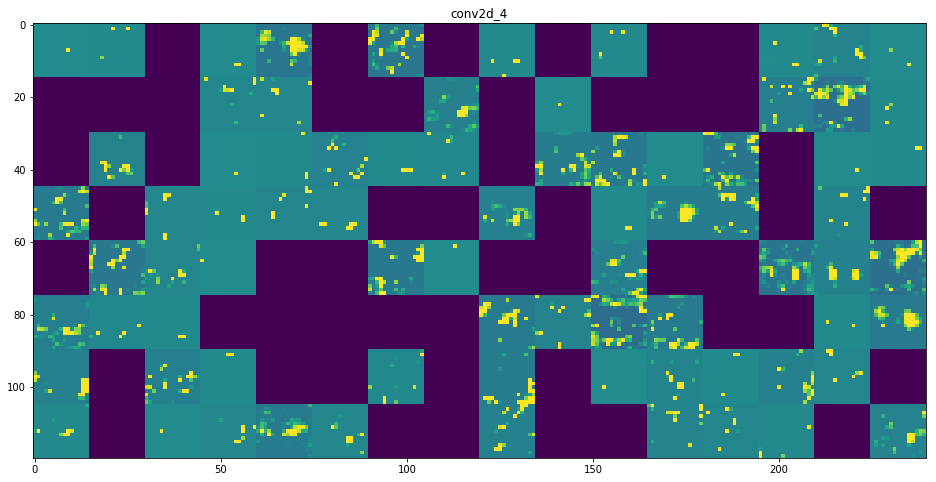

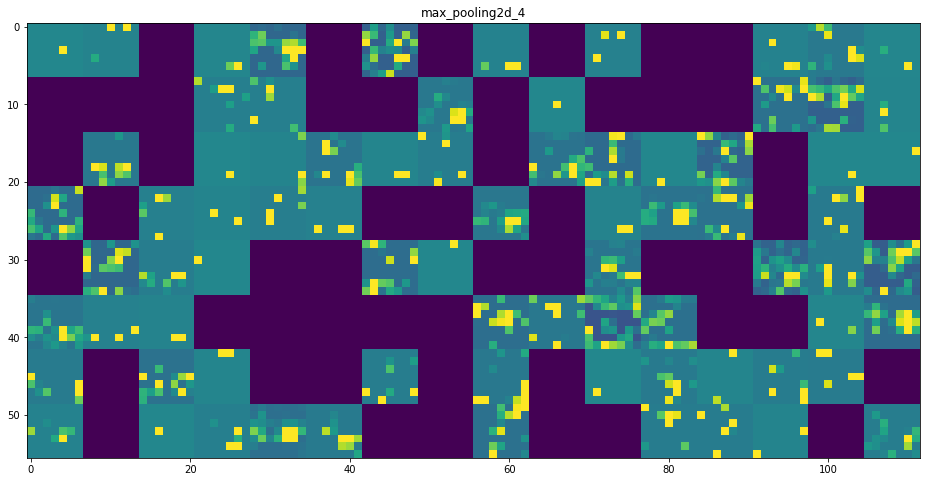

In [13]:
#Visualising every channel in the intermediate activation

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()